In [1]:
import os
import json
import pandas as pd

In [2]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [3]:
with open(os.path.join("data","nesledovat.json")) as nesledovat:
    nesledovat = json.load(nesledovat)

In [4]:
gr = pd.read_json(os.path.join("data","goodreads-hodnoceni.json"))
gr = gr[~gr['ISBN'].isin(nesledovat)]

In [5]:
gr.columns

Index(['ISBN', 'GR_date', 'GR_title', 'GR_rating', 'GR_ratings_count',
       'GR_reviews', 'GR_published'],
      dtype='object')

In [6]:
gr[gr['GR_title'].str.contains('Kidnapped West',na=False)]

,ISBN,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published


In [7]:
gr[gr['GR_ratings_count'] >= 50].groupby('GR_title')['GR_rating'].median().nlargest(30)

GR_title
U severní zdi by Petra Klabouchová                                                          4.710
Budoucnost nepráce by Filip Dřímalka                                                        4.690
V pasti pohlaví by Silvie Lauder                                                            4.590
Severka by Nina Špitálníková                                                                4.520
Rozložíš paměť by Marek Torčík                                                              4.430
Zvonkohra by Eliška Václavíková                                                             4.400
Feministkou snadno a rychle by Lucie Jarkovská                                              4.330
Srpny by Jakub Stanjura                                                                     4.330
Hrdinové kapitalistické práce v Evropě by Saša Uhlová                                       4.320
Černobyl: Pád Atomgradu by Matyáš Namai                                                     4.255
Nebuď p*ča 

In [8]:
gr.groupby("GR_title")['GR_ratings_count'].max().nlargest(30)

GR_title
Srpny by Jakub Stanjura                                                                     938
Těla by Klára Vlasáková                                                                     725
Severka by Nina Špitálníková                                                                615
Kde jsi, když nejsi by Radka Třeštíková                                                     533
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames                                         508
Gazely by Patrik Hartl                                                                      338
Fosilie by Michal Kašpárek                                                                  319
U severní zdi by Petra Klabouchová                                                          313
Rozložíš paměť by Marek Torčík                                                              301
Jazyk a ticho by George Steiner                                                             264
Zvonkohra by Eliška Václavíková

In [9]:
pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr.groupby("GR_title")['GR_ratings_count'].min()).nlargest(25)

GR_title
Formulista by Michaela Schmiedlová                      2
Geostorky by Petr Brož                                  2
Hodina dějepichu by Jan Studnička                       2
Srpny by Jakub Stanjura                                 2
V pasti pohlaví by Silvie Lauder                        2
Vyhoření by Petr Šesták                                 2
Černobyl: Pád Atomgradu by Matyáš Namai                 2
1492: Dobytí Granady by Lukáš Zárybnický                1
Dokud dýchám by Aleš Novotný                            1
Fosilie by Michal Kašpárek                              1
Josefíně všichni lžou by Kateřina Pantovič              1
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames     1
Kde jsi, když nejsi by Radka Třeštíková                 1
Láska, smrt a všechno zlý by Martin Paytok              1
Neodpovídej... by Lucie Bechynková                      1
Neonová cizinka by Filip Klouda                         1
Prázdniny by Tomáš  Staněk                              1
Pád t

In [10]:
dk = pd.read_json(os.path.join("data","databazeknih-hodnoceni.json"))
dk = dk[~dk['ISBN'].isin(nesledovat)]

In [11]:
dk.columns

Index(['ISBN', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Přečtených', 'DK_Knihotéce', 'DK_Chystám_se_číst',
       'DK_Chci_si_koupit', 'DK_Právě_čtených', 'DK_Čtenářské_výzvě',
       'DK_Doporučených', 'DK_dalších_seznamech'],
      dtype='object')

In [12]:
pd.Series(dk.groupby("DK_titul")['DK_ratings_count'].max() - dk.groupby("DK_titul")['DK_ratings_count'].min()).nlargest(20)

DK_titul
Chalupa                                                                    16
Gazely                                                                     12
Někdo z nás                                                                11
Sudetský dům II: Podzim 1947                                                7
V pasti pohlaví: O politice, péči, sexu, násilí a postavení žen v Česku     7
Balada pro Emily                                                            6
Vraní oko                                                                   6
Pláňata                                                                     5
Severka                                                                     5
Markovič: Lovec přízraků                                                    4
Srpny                                                                       4
Vetřelec                                                                    4
13!                                                    

In [13]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nlargest(20)

DK_titul
Feťáci                                                                                 97
Skutečné zločiny na Plzeňsku                                                           97
Kralevic Karel (1334                                                                   95
U severní zdi                                                                          95
Markovič: Lovec přízraků                                                               93
Titanic: Nikdo nechtěl uvěřit                                                          93
Deník Věrky Kohnové: Jak ráda bych tak zůstala                                         92
Geostorky                                                                              92
Heřmánkové údolí                                                                       92
Jednooký král Václav I.                                                                92
Kde končí nebe                                                                         92
S

In [14]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nsmallest(50)

DK_titul
Neodpovídej                                                               63
Smrková Tišina                                                            63
Město v mlze                                                              66
Nejvyšší karta                                                            66
Povídky o lásce                                                           67
Pražačka na vsi                                                           68
Spoutej mě                                                                68
Transfer                                                                  68
Ženy zločinu                                                              68
Němé duše                                                                 70
Teorie býka                                                               70
Zapisovatelé otcovský lásky                                               70
Zlatokopka                                                         

In [15]:
dk['ISBN']

0       9788027904853
2       9788020615770
5       9788072444748
8       9788076374591
9       9788024289472
            ...      
8454    9788000070698
8455    9788024293233
8456    9788025363881
8457    9788076618077
8458    9788076618190
Name: ISBN, Length: 3344, dtype: int64

In [16]:
df['ISBN']

0        9788090810112
1        9788076791206
2        9788088391043
3        9788027097586
4        9788087545881
             ...      
11664    9788075097972
11665    9788076508378
11666    9788076508484
11667    9788076507210
11668    9788025244883
Name: ISBN, Length: 11569, dtype: object

In [17]:
import numpy as np

In [18]:
df['ISBNn'] = df['ISBN'].astype(str)

In [19]:
dk['ISBNn'] = dk['ISBN'].astype(str)

In [20]:
dkm = dk.merge(df, on="ISBNn", how="inner")

In [21]:
dkm.columns

Index(['ISBN_x', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Přečtených', 'DK_Knihotéce', 'DK_Chystám_se_číst',
       'DK_Chci_si_koupit', 'DK_Právě_čtených', 'DK_Čtenářské_výzvě',
       'DK_Doporučených', 'DK_dalších_seznamech', 'ISBNn', 'Titul',
       'Autorstvo', 'Anotace', 'Počet stran', 'Vazba', 'Rozměr', 'Hmotnost',
       'ISBN_y', 'Rok vydání', 'Styl', 'Jazyk', 'Původ', 'Nakladatel',
       'Kategorizace', 'Cena', 'datum', 'Přečtená', 'Pro koho', 'Série', 'Díl',
       'E-kniha', 'Edice', 'Audiokniha', 'Věkové doporučení', 'Ilustrace',
       'Překlad', 'Vydání', 'Originální název', 'Účel knihy', 'Ostatní',
       'Příloha', 'Jazyková úroveň', 'Předběžné datum vydání',
       'Knižní předloha'],
      dtype='object')

In [22]:
import seaborn as sns

In [23]:
merged = pd.DataFrame(dkm[dkm['DK_ratings_count'] > 50].groupby(['ISBNn','Počet stran','DK_Chystám_se_číst'])['DK_rating'].max()).reset_index()

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


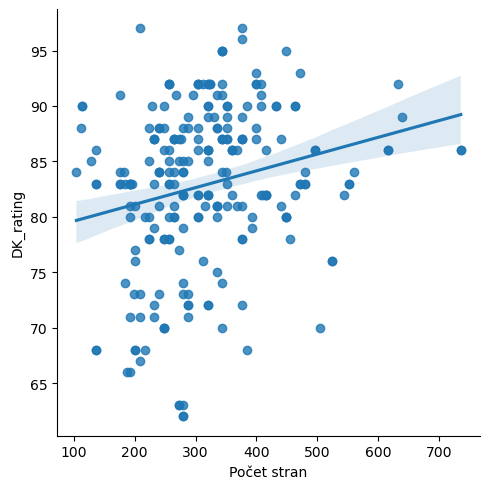

In [25]:
sns.lmplot(x='Počet stran', y='DK_rating', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


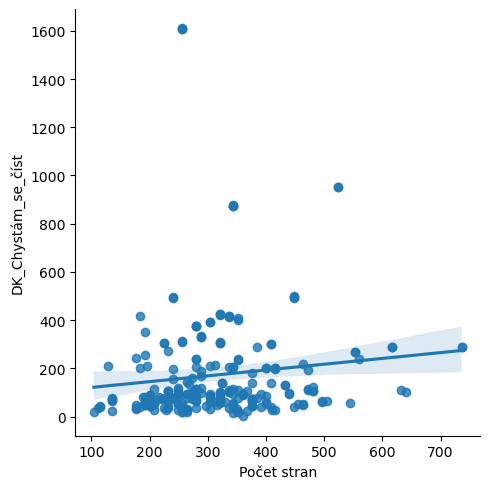

In [26]:
sns.lmplot(x='Počet stran', y='DK_Chystám_se_číst', data=merged)